# ENADE 2017

Dados do curso de Bacharelado em Ciência da Computação da Universidade Federal do Ceará, campus Fortaleza

**Como é calculada a nota do ENADE?**

Para calcular a nota do ENADE, são tiradas separadamente as médias das notas dos estudantes na prova de Formação Geral e na de Componente Específico. Em seguida, é calculada uma média ponderada entre esses dois valores, sendo atribuído peso 1 ao primeiro e 3 ao segundo.

As médias obtidas pelos alunos são então padronizadas, de acordo com a média brasileira e o desvio padrão, em conceitos que vão de 1 a 5. Sendo atribuído o conceito 3 aos cursos que estão na média ou próximos a ela, 1 e 2 aos que estão abaixo e 4 e 5 aos que estão acima.

Dessa forma, **a nota do ENADE é sempre um valor relativo**, ou seja, aponta para uma **comparação entre o curso da instituição de ensino superior observada e os cursos restantes daquela área no país**

### Carregando as bibliotecas necessárias

In [29]:
# Biblioteca científica
import numpy as np
# Biblioteca para análise de dados
import pandas as pd
# Suprimindo os warnings da biblioteca pandas
pd.options.mode.chained_assignment = None
# Bibliotecas de visualização de dados
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

### Carregando e verificando os dados

In [649]:
# Dados do Exame Nacional de Desempenho dos Estudantes - 2017 (Curso de computação da UFC, campus Fortaleza)
df = pd.read_csv('dados/computacao_UFC_ENDADE2017.csv')

In [650]:
# Exibindo o cabeçalho do dataframe
df.head()

,CO_IES,Instituicao,Sigla,CO_CURSO,NO_CURSO,Municipio,UF,TP_SEXO,NU_IDADE,QE_I01,...,QE_I18,QE_I19,QE_I20,QE_I21,QE_I22,QE_I23,QE_I24,QE_I25,QE_I26,NT_GER
0,583,UNIVERSIDADE FEDERAL DO CEARÁ (UFC),UFC,13980,CIÊNCIA DA COMPUTAÇÃO,Fortaleza,CE,M,29,C,...,A,A,B,B,A,23,B,A,A,49.0
1,583,UNIVERSIDADE FEDERAL DO CEARÁ (UFC),UFC,13980,CIÊNCIA DA COMPUTAÇÃO,Fortaleza,CE,M,21,B,...,A,A,B,A,A,23,B,A,B,78.0
2,583,UNIVERSIDADE FEDERAL DO CEARÁ (UFC),UFC,13980,CIÊNCIA DA COMPUTAÇÃO,Fortaleza,CE,M,26,D,...,A,A,B,A,A,23,B,A,A,67.0
3,583,UNIVERSIDADE FEDERAL DO CEARÁ (UFC),UFC,13980,CIÊNCIA DA COMPUTAÇÃO,Fortaleza,CE,M,22,C,...,A,A,B,A,A,23,B,A,A,58.0
4,583,UNIVERSIDADE FEDERAL DO CEARÁ (UFC),UFC,13980,CIÊNCIA DA COMPUTAÇÃO,Fortaleza,CE,M,25,C,...,A,A,B,B,A,23,B,A,B,54.0


In [651]:
# Tamanho do dataframe
print('O dataframe é composto por', df.shape[0], 'linhas e', df.shape[1], 'colunas')

O dataframe é composto por 39 linhas e 34 colunas


In [652]:
# Exibindo as informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 34 columns):
CO_IES         39 non-null int64
Instituicao    39 non-null object
Sigla          39 non-null object
CO_CURSO       39 non-null int64
NO_CURSO       39 non-null object
Municipio      39 non-null object
UF             39 non-null object
TP_SEXO        39 non-null object
NU_IDADE       39 non-null int64
QE_I01         39 non-null object
QE_I02         39 non-null object
QE_I04         39 non-null object
QE_I05         39 non-null object
QE_I06         39 non-null object
QE_I07         39 non-null object
QE_I08         39 non-null object
QE_I09         39 non-null object
QE_I10         39 non-null object
QE_I11         39 non-null object
QE_I12         39 non-null object
QE_I13         39 non-null object
QE_I14         39 non-null object
QE_I15         39 non-null object
QE_I17         39 non-null object
QE_I18         39 non-null object
QE_I19         39 non-null object
QE_I20         3

In [653]:
# Descrevendo as variáveis numéricas
desc_int = df.drop(['CO_IES', 'CO_CURSO'], axis=1).describe(include=[np.number])
desc_int.loc['count'] = desc_int.loc['count'].astype(int).astype(str)
desc_int.iloc[1:] = desc_int.iloc[1:].applymap('{:.0f}'.format)
desc_int.T

,count,mean,std,min,25%,50%,75%,max
NU_IDADE,39,24,2,21,22,23,26,30
QE_I23,39,23,0,21,23,23,23,23
NT_GER,39,57,14,19,50,59,68,78


In [654]:
# Descrevendo as variáveis categóricas
cat_obj = df.drop(['Instituicao', 'Sigla', 'Municipio', 'UF', 'NO_CURSO'], axis=1).describe(include=[np.object])
cat_obj.T

,count,unique,top,freq
TP_SEXO,39,2,M,35
QE_I01,39,4,C,23
QE_I02,39,5,B,26
QE_I04,39,5,B,17
QE_I05,39,5,B,10
QE_I06,39,3,D,29
QE_I07,39,4,D,16
QE_I08,39,2,A,38
QE_I09,39,4,D,19
QE_I10,39,1,A,39


### Pré-processessamento dos dados

In [655]:
#### Selecionando as variáveis que serão utilizadas
df = df[['TP_SEXO', 'NU_IDADE', 'QE_I01', 'QE_I02', 'QE_I04', 'QE_I05',
       'QE_I06', 'QE_I07', 'QE_I08', 'QE_I09', 'QE_I10', 'QE_I11', 'QE_I12',
       'QE_I13', 'QE_I14', 'QE_I15', 'QE_I17', 'QE_I18', 'QE_I19', 'QE_I20',
       'QE_I21', 'QE_I22', 'QE_I23', 'QE_I24', 'QE_I25', 'QE_I26','NT_GER']]

#### Convertendo recursos categóricos

A biblioteca do scikit trabalha exclusivamente com atributos numéricos. Logo, é necessário transformar os campos categóricos em variáveis dummy (a variável dummy é uma variável categegórica transformada em numérica). Caso contrário, nosso algoritmo não aceitará esses atributos diretamente como entradas.

In [656]:
# Listando as colunas com variáveis categóricas
df.dtypes[df.dtypes == "object"].index

Index(['TP_SEXO', 'QE_I01', 'QE_I02', 'QE_I04', 'QE_I05', 'QE_I06', 'QE_I07',
       'QE_I08', 'QE_I09', 'QE_I10', 'QE_I11', 'QE_I12', 'QE_I13', 'QE_I14',
       'QE_I15', 'QE_I17', 'QE_I18', 'QE_I19', 'QE_I20', 'QE_I21', 'QE_I22',
       'QE_I24', 'QE_I25', 'QE_I26'],
      dtype='object')

In [657]:
# Variáveis categóricas que serão utilizadas como preditores
categoricas_df = pd.get_dummies(df[['TP_SEXO', 'QE_I01', 'QE_I02', 'QE_I04', 'QE_I05', 'QE_I06', 'QE_I07',
                                    'QE_I08', 'QE_I09', 'QE_I10', 'QE_I11', 'QE_I12', 'QE_I13', 'QE_I14',
                                    'QE_I15', 'QE_I17', 'QE_I18', 'QE_I19', 'QE_I20', 'QE_I21', 'QE_I22',
                                    'QE_I24', 'QE_I25', 'QE_I26']], drop_first=True)

In [658]:
# Criando o dataset de treino após o pré-processamento
# Removendo os atributos numéricos do dataset
temp = df.drop(['TP_SEXO', 'QE_I01', 'QE_I02', 'QE_I04', 'QE_I05', 'QE_I06', 'QE_I07',
                                    'QE_I08', 'QE_I09', 'QE_I10', 'QE_I11', 'QE_I12', 'QE_I13', 'QE_I14',
                                    'QE_I15', 'QE_I17', 'QE_I18', 'QE_I19', 'QE_I20', 'QE_I21', 'QE_I22',
                                    'QE_I24', 'QE_I25', 'QE_I26'], axis=1)
# Criando novo dataset com as variáveis numéricas e as variáveis dummy
df = pd.concat([temp,categoricas_df],axis=1)

## Treinando um modelo de regressão linear

Vamos agora começar a treinar o modelo de regressão. Precisamos primeiro dividir nossos dados em uma matriz X que contém os recursos para treinar, e uma matriz y com a variável alvo, neste caso, a coluna NT_GER (Nota Geral no ENADE 2017). 

In [659]:
# Separando as variáveis preditoras e alvo
# Variáveis preditoras
X = df.drop(['NT_GER'], axis=1)
# Variável alvo
y = df['NT_GER']

#### Split de treino/teste

Agora vamos dividir os dados em um conjunto de treinamento e um conjunto de testes. Vamos criar o modelo usando o conjunto de treinamento e depois usar o conjunto de testes para avaliar o modelo.

In [660]:
from sklearn.model_selection import train_test_split

In [661]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1001)

#### Criando e treinando o modelo

In [662]:
from sklearn.linear_model import LinearRegression

In [663]:
lm = LinearRegression()

In [664]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Avaliação do modelo

In [665]:
# Exibindo a intercepção
print(lm.intercept_)

30.513507513790355


In [666]:
# Exibindo os coeficientes
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
# 10 primeiros coeficientes
coeff_df.head(10)

,Coefficient
NU_IDADE,-2.391775
QE_I23,3.845842
TP_SEXO_M,0.654298
QE_I01_B,0.356016
QE_I01_C,2.722306
QE_I01_D,-3.667542
QE_I02_B,1.136768
QE_I02_C,-1.537507
QE_I02_D,-2.932185
QE_I02_E,0.438459


#### Predições do modelo

In [667]:
predictions = lm.predict(X_test)

#### Metricas de avaliação da regressão

In [668]:
# Computando o RMSE (Root Mean Square Error)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 18.62654597961842


In [669]:
# Coeficiente de determinação (R²)
print('R²:', metrics.r2_score(y_test, predictions))

R²: -0.7288319819658358


#### Visualizações

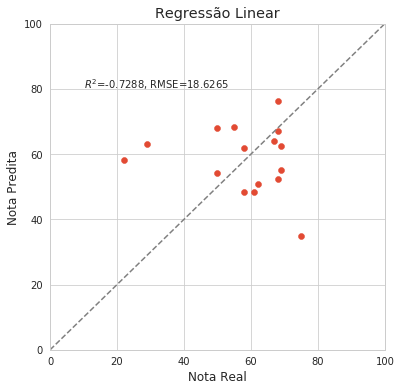

In [670]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(y_test, predictions)
ax.plot([0, 100], [0, 100], '--k', c='gray')
ax.set_ylabel('Nota Predita')
ax.set_xlabel('Nota Real')
ax.set_title('Regressão Linear')
ax.text(10, 80, r'$R^2$=%.4f, RMSE=%.4f' % (
    metrics.r2_score(y_test, predictions), np.sqrt(metrics.mean_squared_error(y_test, predictions))))
ax.set_xlim([0, 100])
ax.set_ylim([0, 100])

plt.show()

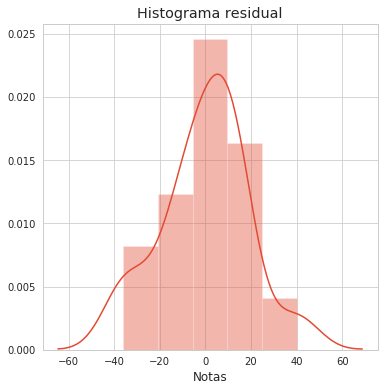

In [671]:
### Histograma residual
fig, ax = plt.subplots(figsize=(6, 6))
sns.distplot((y_test - predictions))
ax.set_title('Histograma residual')
ax.set_xlabel('Notas')
plt.show()